<a href="https://colab.research.google.com/github/Adesoji1/Hamoye_Internship/blob/main/Multiple_regression_hamoye_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!Its great to code again

In [2]:
import pandas as pd #importing necessary libraries
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
import pandas as pd #importing pandas to  read the csv file
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/energydata_complete .csv')
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [4]:
print(df.shape) #getting the dimension of the dataset
df.describe()

(19735, 29)


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [5]:
df.drop(labels = ['date','lights'], axis = 1) #removing label temporarily

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [6]:
df.drop(labels = ['date','lights'], axis = 1, inplace=True) #removing the 2 colums permanently
df

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [7]:
df.isna().sum()

Appliances     0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [ ]:
df.isnull().sum()

Appliances     0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [ ]:
df.isna()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19731,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19732,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19733,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df_scaled = df.copy() #creating another variable name for the dataset without interfering with the original dataframe called df, so i copied it

In [9]:
df_linear_data_regression = df.copy() # same as above, but this will be used for linear regression dataset

In [10]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler() #Method 1

In [11]:
#method 2 for normalizing data to be between 0 and 1
for column in df_linear_data_regression.columns:
  df_linear_data_regression [column] = (df_linear_data_regression[column] - df_linear_data_regression[column].min()) / (df_linear_data_regression[column].max() - df_linear_data_regression[column].min())
 #viewing the normalized dataframe
  print (df_linear_data_regression)

       Appliances         T1       RH_1  ...  Tdewpoint        rv1        rv2
0        0.046729  19.890000  47.596667  ...   5.300000  13.275433  13.275433
1        0.046729  19.890000  46.693333  ...   5.200000  18.606195  18.606195
2        0.037383  19.890000  46.300000  ...   5.100000  28.642668  28.642668
3        0.037383  19.890000  46.066667  ...   5.000000  45.410389  45.410389
4        0.046729  19.890000  46.333333  ...   4.900000  10.084097  10.084097
...           ...        ...        ...  ...        ...        ...        ...
19730    0.084112  25.566667  46.560000  ...  13.333333  43.096812  43.096812
19731    0.074766  25.500000  46.500000  ...  13.300000  49.282940  49.282940
19732    0.242991  25.500000  46.596667  ...  13.266667  29.199117  29.199117
19733    0.383178  25.500000  46.990000  ...  13.233333   6.322784   6.322784
19734    0.392523  25.500000  46.600000  ...  13.200000  34.118851  34.118851

[19735 rows x 27 columns]
       Appliances        T1       RH_

In [12]:
df_linear_data_regression

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,0.381070,0.841827,0.170594,0.653428,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,0.375443,0.839872,0.170594,0.651064,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,0.367487,0.830704,0.170594,0.646572,0.173329,0.655586,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,0.363800,0.833401,0.164310,0.641489,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,0.361859,0.848264,0.170594,0.639362,0.164175,0.650788,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.084112,0.926786,0.537657,0.711655,0.606309,0.830841,0.579374,0.864865,0.765258,0.752031,0.339590,0.898317,0.000000,0.858624,0.755319,0.768386,0.701645,0.864724,0.729443,0.891747,0.602326,0.416667,0.238095,0.348718,0.901961,0.861981,0.861981
19731,0.074766,0.919747,0.536006,0.701769,0.607836,0.825302,0.582178,0.864865,0.765258,0.754897,0.338487,0.880852,0.000000,0.864010,0.752280,0.768386,0.691912,0.864724,0.729443,0.887460,0.602326,0.421053,0.250000,0.361538,0.900452,0.985726,0.985726
19732,0.242991,0.919747,0.538666,0.692651,0.627198,0.818378,0.603988,0.864865,0.771233,0.754897,0.337585,0.864260,0.000000,0.862394,0.751773,0.768386,0.687457,0.864724,0.729443,0.883173,0.602326,0.425439,0.261905,0.374359,0.898944,0.583979,0.583979
19733,0.383178,0.919747,0.549491,0.677054,0.634717,0.805085,0.585294,0.864865,0.773794,0.752031,0.336583,0.829525,0.000000,0.858624,0.748075,0.764953,0.682617,0.864724,0.730581,0.878885,0.602326,0.429825,0.273810,0.387179,0.897436,0.126371,0.126371


In [13]:
df_linear_data_regression.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [14]:
df_linear_data_regression.drop(labels=['Appliances', 'T1', 'RH_1', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5',  'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'], axis=1, inplace = True)

In [15]:
df_linear_data_regression

,T2,T6
0,0.225345,0.381070
1,0.225345,0.375443
2,0.225345,0.367487
3,0.225345,0.363800
4,0.225345,0.361859
...,...,...
19730,0.711655,0.898317
19731,0.701769,0.880852
19732,0.692651,0.864260
19733,0.677054,0.829525


In [ ]:
#x =df_linear_data_regression.iloc[:,:-1] for retrieving values in a column and assigning to a variable x and using index and slicing for reference point
#y = df_linear_data_regression.iloc[:,1] same for y as in x

In [ ]:
y

0        0.381070
1        0.375443
2        0.367487
3        0.363800
4        0.361859
           ...   
19730    0.898317
19731    0.880852
19732    0.864260
19733    0.829525
19734    0.788580
Name: T6, Length: 19735, dtype: float64

In [17]:
dataset_new  = np.array(df_linear_data_regression)
dataset_new

array([[0.22534529, 0.3810702 ],
       [0.22534529, 0.37544268],
       [0.22534529, 0.36748654],
       ...,
       [0.69265118, 0.86426042],
       [0.67705355, 0.82952506],
       [0.66617051, 0.78858002]])

In [18]:
new_unstacked_dataset_new= pd.DataFrame(dataset_new, columns = ['x', 'y'])
print(new_unstacked_dataset_new)

              x         y
0      0.225345  0.381070
1      0.225345  0.375443
2      0.225345  0.367487
3      0.225345  0.363800
4      0.225345  0.361859
...         ...       ...
19730  0.711655  0.898317
19731  0.701769  0.880852
19732  0.692651  0.864260
19733  0.677054  0.829525
19734  0.666171  0.788580

[19735 rows x 2 columns]


In [19]:
x = new_unstacked_dataset_new.iloc[:,:-1]
y = new_unstacked_dataset_new.iloc[:,1]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3,random_state=42) #train test split of the entire dataset, test size of 30% which is held for test.70% for training and 42 of randomstate for randomnliness in selection of values

In [21]:
from sklearn.linear_model import LinearRegression #importing linear regression model
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print(regressor.intercept_) #Intercept of the line

0.13176427761888454


In [23]:
regressor.coef_ #coeff

array([0.8910771])

In [24]:
cdf1 = pd.DataFrame(regressor.coef_,x.columns,columns = ['coeff'])

In [25]:
cdf1

,coeff
x,0.891077


In [26]:
from sklearn import metrics
regressor.fit(X_train,Y_train)
predict_20 = regressor.predict(X_test)
print('R2 score', metrics.r2_score(Y_test,predict_20))
   

R2 score 0.6427789637197381


In [27]:
predictionss = regressor.predict(X_test)
predictionss

array([0.23928945, 0.46794238, 0.23108472, ..., 0.3001772 , 0.4297256 ,
       0.3217686 ])

In [28]:
metrics.mean_absolute_error(Y_test,predictionss)#MAE

0.08216970202681717

In [29]:
metrics.mean_squared_error(Y_test,predictionss)#MSE

0.011166285957258448

In [31]:
import numpy as np
rss = np.sum(np.square(Y_test - predictionss))
rss

66.11557915292727

In [32]:
np.sqrt(metrics.mean_squared_error(Y_test,predictionss))#RMSE

0.10567064851347534

In [33]:
from sklearn.metrics import r2_score 
a =x
b =y
R_square = r2_score(a, b) 
print('Coefficient of Determination', R_square) 

Coefficient of Determination 0.16338328288387494


In [34]:
x

,x
0,0.225345
1,0.225345
2,0.225345
3,0.225345
4,0.225345
...,...
19730,0.711655
19731,0.701769
19732,0.692651
19733,0.677054


In [35]:
from sklearn.preprocessing import MinMaxScaler #free styling for the other dataframe copied from the original df dataframe and normalizing
min_max_scaler = MinMaxScaler() #Method 1

In [36]:
scaled = min_max_scaler.fit_transform(df_scaled)
print(scaled)

[[0.04672897 0.32734952 0.56618659 ... 0.53846154 0.26544891 0.26544891]
 [0.04672897 0.32734952 0.54132648 ... 0.53393665 0.37208289 0.37208289]
 [0.03738318 0.32734952 0.53050179 ... 0.52941176 0.57284766 0.57284766]
 ...
 [0.24299065 0.91974657 0.53866618 ... 0.89894419 0.58397859 0.58397859]
 [0.38317757 0.91974657 0.54949087 ... 0.8974359  0.12637146 0.12637146]
 [0.39252336 0.91974657 0.53875791 ... 0.8959276  0.68239057 0.68239057]]


In [ ]:
#copy the data
df_min_max_scaled = df.copy()

#applying normalization technique using iteration, METHOD 2

for column in df_min_max_scaled.columns:
  df_min_max_scaled [column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
 #viewing the normalized dataframe
  print (df_min_max_scaled)

       Appliances         T1       RH_1  ...  Tdewpoint        rv1        rv2
0        0.046729  19.890000  47.596667  ...   5.300000  13.275433  13.275433
1        0.046729  19.890000  46.693333  ...   5.200000  18.606195  18.606195
2        0.037383  19.890000  46.300000  ...   5.100000  28.642668  28.642668
3        0.037383  19.890000  46.066667  ...   5.000000  45.410389  45.410389
4        0.046729  19.890000  46.333333  ...   4.900000  10.084097  10.084097
...           ...        ...        ...  ...        ...        ...        ...
19730    0.084112  25.566667  46.560000  ...  13.333333  43.096812  43.096812
19731    0.074766  25.500000  46.500000  ...  13.300000  49.282940  49.282940
19732    0.242991  25.500000  46.596667  ...  13.266667  29.199117  29.199117
19733    0.383178  25.500000  46.990000  ...  13.233333   6.322784   6.322784
19734    0.392523  25.500000  46.600000  ...  13.200000  34.118851  34.118851

[19735 rows x 27 columns]
       Appliances        T1       RH_

In [ ]:
#he target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set.
y=df.iloc[:,-3]

In [ ]:
df_min_max_scaled.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
X = df_min_max_scaled [['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2']] #independent variables x

In [ ]:
y = df_min_max_scaled['Appliances'] #dependent variable y

In [ ]:
from sklearn.model_selection import train_test_split #importing the sckitilearn machine learning library

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42) # splitting and training the dataset into train and test split

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression() # creating the class or object

In [ ]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lm.intercept_)

0.15290295882253008


In [ ]:
lm.coef_ #Xtrain

array([-0.00328105,  0.5535466 , -0.23617792, -0.45669795,  0.29062714,
        0.09604827,  0.028981  ,  0.02638578, -0.01565684,  0.01600579,
        0.23642491,  0.03804865,  0.01031878, -0.04461364,  0.10199505,
       -0.15759548, -0.18994077, -0.03980032, -0.32185967,  0.00683933,
       -0.07767065,  0.02918313,  0.01230661,  0.11775773,  0.0007701 ,
        0.0007701 ])

In [ ]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns = ['coeff'])

In [ ]:
cdf

,coeff
T1,-0.003281
RH_1,0.553547
T2,-0.236178
RH_2,-0.456698
T3,0.290627
RH_3,0.096048
T4,0.028981
RH_4,0.026386
T5,-0.015657
RH_5,0.016006


In [ ]:
import matplotlib.pyplot as plt
df_min_max_scaled.plot(kind = 'bar') #To plot

In [ ]:
#Prediction for multiple linear regression below

In [ ]:
predictions = lm.predict(X_test)
predictions

array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

In [ ]:
y_test

8980     0.028037
2754     0.074766
9132     0.037383
14359    0.037383
8875     0.056075
           ...   
831      0.224299
10993    0.046729
11761    0.037383
12364    0.093458
11863    0.037383
Name: Appliances, Length: 5921, dtype: float64

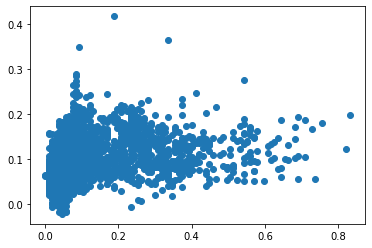

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test,predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


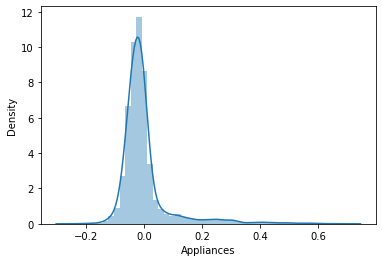

In [ ]:
import seaborn as sns
sns.distplot((y_test-predictions),bins = 50)

In [ ]:
#The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model

In [ ]:
lm. fit(X_train,y_train)
score = lm.score(X_train,y_train)
print ("training score:", score)

training score: 0.14471942308518748


In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,predictions)#MAE

0.05013362397742955

In [ ]:
metrics.mean_squared_error(y_test,predictions)#MSE

0.007658778867195365

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,predictions)) #RMSE

0.08751444947661709

In [ ]:
metrics.explained_variance_score(y_test,predictions) #Explained only 14% of variance in the dataset, this is poor

0.1490608224243194

In [ ]:
#writing to save
newcsv = df_min_max_scaled.to_csv('energy_data_normalized.csv')


In [ ]:
from sklearn.metrics import r2_score
from scipy import stats


In [ ]:
#Using Ridge Regression with Alpha = 0.5
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(X_train, y_train)
predict_1 = ridge_reg.predict(X_test)           # Use this model to predict the test data
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,predict_1))) #RMSE
print('R2 score', metrics.r2_score(y_test,predict_1)) #R2 Score

Root Mean Square Error (RMSE) 0.08754118590838056
R2 score 0.14838234823312713


In [ ]:
#Using Ridge Regression with Alpha = 0.0001
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.0001)
ridge_reg.fit(X_train, y_train)
predict_6 = ridge_reg.predict(X_test)           # Use this model to predict the test data
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,predict_6))) #RMSE
print('R2 score', metrics.r2_score(y_test,predict_6)) #R2 Score
import numpy as np
rss2 = np.sum(np.square(Y_test - predict_6))
rss2

Root Mean Square Error (RMSE) 0.087514451404567
R2 score 0.1489024256935495


794.5422696716722

In [ ]:
#Using Ridge Regression with Alpha = 2
ridge_reg_2 = Ridge(alpha=2)
ridge_reg_2.fit(X_train, y_train)
predict_2 = ridge_reg_2.predict(X_test)           # Use this model to predict the test data
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,predict_2))) #RMSE
print('R2 score', metrics.r2_score(y_test,predict_2)) #R2 Score

Root Mean Square Error (RMSE) 0.08768227713791654
R2 score 0.1456350103115268


In [ ]:
#Using Ridge Regression with Alpha = 4
ridge_reg_4 = Ridge(alpha=4)
ridge_reg_4.fit(X_train, y_train)
predict_3 = ridge_reg_4.predict(X_test)           # Use this model to predict the test data
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,predict_3))) #RMSE
print('R2 score', metrics.r2_score(y_test,predict_3)) #R2 Score

Root Mean Square Error (RMSE) 0.08786366479468531
R2 score 0.14209651741414886


In [ ]:
#Using Ridge Regression with Alpha = 0.4
ridge_reg_5 = Ridge(alpha=0.4)
ridge_reg_5.fit(X_train, y_train)
predict_7 = ridge_reg_5.predict(X_test)           # Use this model to predict the test data
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,predict_7))) #RMSE
print('R2 score', metrics.r2_score(y_test,predict_7)) #R2 Score

Root Mean Square Error (RMSE) 0.08753385704628001
R2 score 0.14852493545092604


LASSO REGRESSION

In [ ]:
#Using Lasso Regression with Alpha = 0.001
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
predict_4 = lasso_reg.predict(X_test)# Use this model to predict the test data
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,predict_4))) #RMSE
print('R2 score', metrics.r2_score(y_test,predict_4)) #R2 Score


Root Mean Square Error (RMSE) 0.09358170467245136
R2 score 0.026800880567125818


In [ ]:
#Using Lasso Regression with Alpha = 0.1
lasso_reg_1 = Lasso(alpha=0.1)
lasso_reg_1.fit(X_train, y_train)
predict_5 = lasso_reg_1.predict(X_test)# Use this model to predict the test data
print('Root Mean Square Error (RMSE)', np.sqrt(metrics.mean_squared_error(y_test,predict_5))) #RMSE
print('R2 score', metrics.r2_score(y_test,predict_5)) #R2 Score

Root Mean Square Error (RMSE) 0.09486157889204758
R2 score -1.1536689688007584e-06


In [ ]:
#Lesson 4: Penalization Methods
#● Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(X_train, y_train)
#● Feature Selection and Lasso Regression
from sklearn.linear_model import Lasso
model=lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
Linear_model = LinearRegression()
#model=Linear_model.fit(X_train, y_train)
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
 weights = pd.Series(model.coef_, feat.columns).sort_values()
 weights_df = pd.DataFrame(weights).reset_index()
 weights_df.columns = ['Features', col_name]
 weights_df[col_name].round(3)
 return weights_df
linear_model_weights = get_weights_df(model, X_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, X_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [ ]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_out,-0.049557,-0.050541,-0.049557
1,RH_8,-0.000110,-0.156596,-0.000110
2,T1,0.000000,-0.021549,0.000000
3,Tdewpoint,0.000000,0.076668,0.000000
4,Visibility,0.000000,0.012032,0.000000
5,Press_mm_hg,-0.000000,0.006516,-0.000000
6,T_out,0.000000,-0.250765,0.000000
7,RH_9,-0.000000,-0.041701,-0.000000
8,T9,-0.000000,-0.188584,-0.000000
9,T8,0.000000,0.100754,0.000000
